In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np
import papermill as pm

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
Nsim = 15
FirstStim = 9
LastStim = 20.0

In [3]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [4]:
print Nsim
print FirstStim
print LastStim

15
9
20.0


In [5]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

Mp = np.zeros((int(Nsim), 1))
Hp = np.zeros((int(Nsim), 1))
Stim = np.zeros((int(Nsim), 1))
emg = np.zeros([len(t), int(Nsim)])
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345545 synapses were built
All the 0 synaptic noises were built


In [6]:
for j  in xrange(0, int(Nsim)):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.time()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i],0)
        pools[2].atualizeAfferentPool(t[i],0)
    toc = time.time()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    emg[:,[j]] = pools[0].emg
    pools[0].listSpikes()
    pools[1].listSpikes()
    pools[2].listSpikes()
    sp1 = pools[0].poolTerminalSpikes
    sp2 = pools[1].poolTerminalSpikes
    sp2 = pools[2].poolTerminalSpikes
    for k in xrange(0, len(pools)):
        pools[k].reset()

58.8500900269 seconds
[ 0.]
[ 0.]
66.641824007 seconds
[ 0.]
[ 0.]
69.7606091499 seconds
[ 0.]
[ 0.]
70.4111950397 seconds
[ 0.]
[ 0.03862462]
70.9125289917 seconds
[ 0.]
[ 0.26468734]
71.9886639118 seconds
[ 0.37756371]
[ 0.52035626]
73.0706739426 seconds
[ 0.75258846]
[ 0.96584192]
74.4829890728 seconds
[ 0.95615222]
[ 0.82221762]
75.2803750038 seconds
[ 1.23387621]
[ 0.52806707]
75.4274480343 seconds
[ 1.41496845]
[ 0.32146582]
73.3810169697 seconds
[ 1.56574052]
[ 0.19935298]
73.0621361732 seconds
[ 1.64207993]
[ 0.07030678]
73.4695031643 seconds
[ 1.6567865]
[ 0.01390144]
78.9523971081 seconds
[ 1.6657667]
[ 0.01607211]
80.0000588894 seconds
[ 1.66980488]
[  2.68026144e-08]


<IPython.core.display.Javascript object>


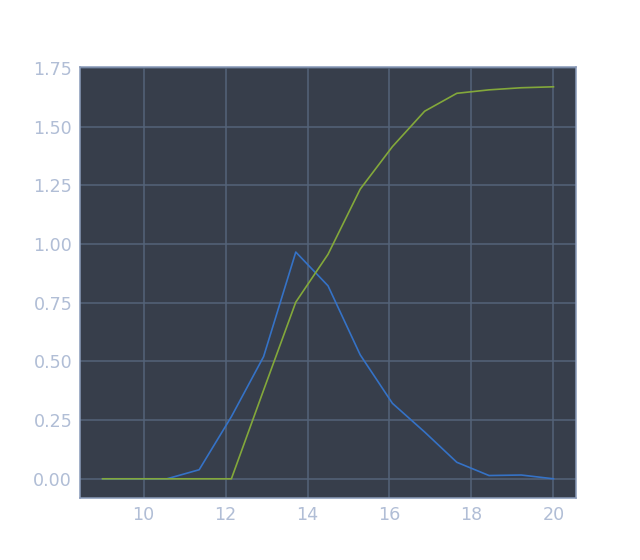

<IPython.core.display.Javascript object>


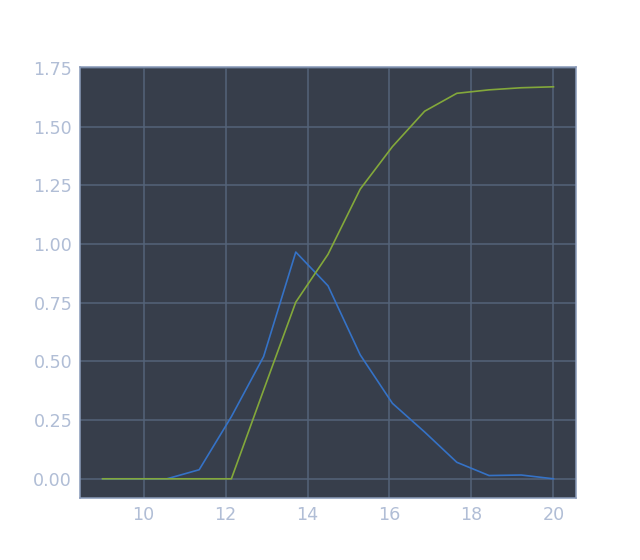

In [7]:
from jupyterthemes import jtplot
jtplot.style()
f1 = plt.figure()
plt.plot(Stim, Hp, Stim, Mp)
pm.display('mHcurves', f1)

In [8]:
np.max(Hp)/np.max(Mp)

0.57841603484228254

In [9]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.37756371],
       [ 0.75258846],
       [ 0.95615222],
       [ 1.23387621],
       [ 1.41496845],
       [ 1.56574052],
       [ 1.64207993],
       [ 1.6567865 ],
       [ 1.6657667 ],
       [ 1.66980488]])

<IPython.core.display.Javascript object>


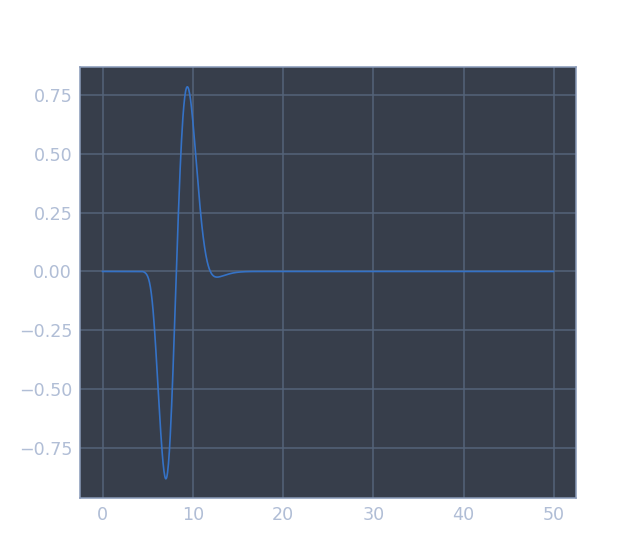

In [10]:
f2 = plt.figure()
plt.plot(t, emg[:,14])


In [11]:
pools[0].listSpikes()

<IPython.core.display.Javascript object>


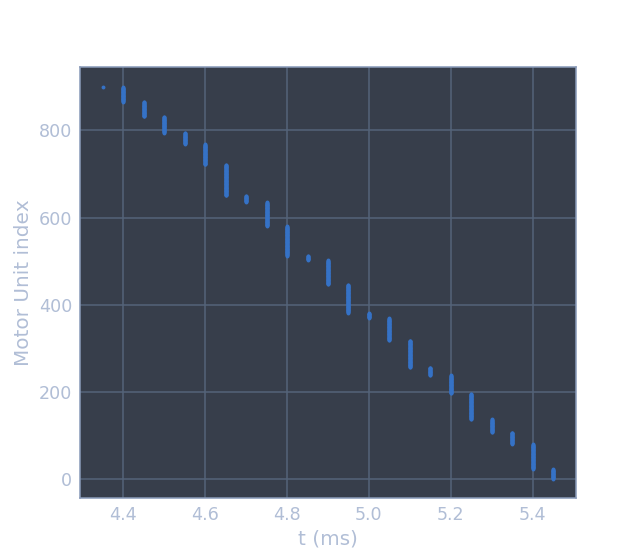

<IPython.core.display.Javascript object>


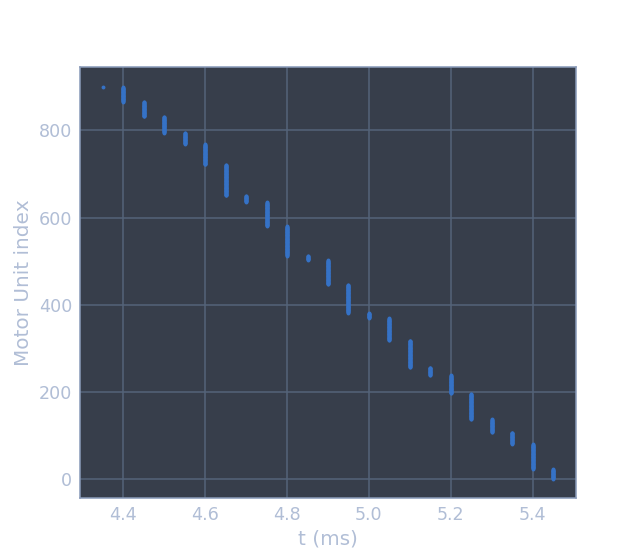

In [12]:
f3 = plt.figure()
plt.plot(sp1[:, 0],
         sp1[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')
pm.display('MNspikes', f3)

In [13]:
pools[0].poolTerminalSpikes[:, 1]

array([], dtype=float64)